In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

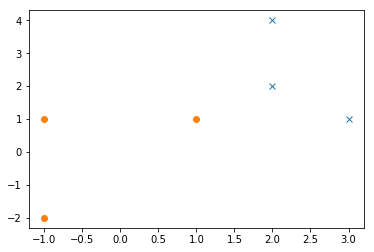

In [12]:
X = [[2,4],[3,1],[2,2],[1,1],[-1,1],[-1,-2]]
y = [1,1,1,-1,-1,-1]
plt.plot([x[0] for x in X[:3]], [x[1] for x in X[:3]], 'x')
plt.plot([x[0] for x in X[3:]], [x[1] for x in X[3:]], 'o')

In [38]:
# perceptron algorithm
lr = 0.1
W = np.array([0,0,0])
MAX = 100

flag = True
count = 0
while flag:
    flag = False
    if count > MAX:
        break
    for i, x in enumerate(X):
        count += 1
        data = np.array(x + [1])
        yp = np.dot(data, W)
        if y[i]*yp <= 0:
            flag = True
            W = W + lr*data*y[i]
        else:
            continue
print(f'total iteration is {count}')
print('W is ', W)

total iteration is 54
W is  [ 0.3  0.1 -0.5]


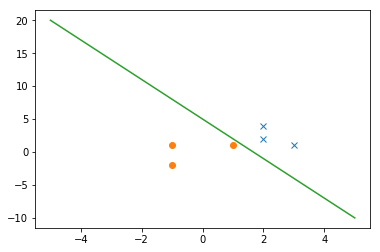

In [39]:
xx = [i for i in np.arange(-5, 5, 0.001)]
yy = [-W[0]/W[1]*i -W[2]/W[1] for i in xx]
plt.plot([x[0] for x in X[:3]], [x[1] for x in X[:3]], 'x')
plt.plot([x[0] for x in X[3:]], [x[1] for x in X[3:]], 'o')
plt.plot(xx, yy)

In [97]:
class Perceptron:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.W = np.zeros(X.shape[1])
        self.b = 0
    
    def train(self, lr=0.1, max_iter=1000):
        c = 0
        while c < max_iter:
            terminate = True
            for i,x in enumerate(self.X):
                c += 1
                if c >= max_iter:
                    terminate = True
                    break
                yp = np.dot(self.W, x) + self.b
                if yp*self.y[i] <= 0:
                    self.W = self.W + lr*self.y[i]*x
                    self.b = self.b + lr*self.y[i]
                    terminate = False
                else:
                    continue
            if terminate:
                break
        print(f'model trained for {count} iterations')
    def predict(self, x):
        return x*self.W + self.b

In [98]:
perceptron = Perceptron(np.array(X), np.array(y))

In [99]:
perceptron.train()

model trained for 54 iterations


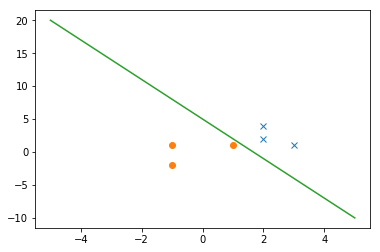

In [100]:
W, b = perceptron.W, perceptron.b
xx = np.linspace(-5,5,1000)
yy = [-W[0]/W[1]*i -b/W[1] for i in xx]
plt.plot([x[0] for x in X[:3]], [x[1] for x in X[:3]], 'x')
plt.plot([x[0] for x in X[3:]], [x[1] for x in X[3:]], 'o')
plt.plot(xx, yy)

In [102]:
np.dot(np.arange(10), np.arange(10).reshape(10,1))

array([285])